In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import bloscpack as bp

import sys
import os
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from data_manager import *
from metadata import *

from annotation_utilities import *

from itertools import izip
import pandas as pd

import time

import matplotlib.pyplot as plt
%matplotlib inline

from vis3d_utilities import *

Setting environment for Local Macbook Pro


In [2]:
with open('colors.txt', 'r') as f:
    colors = {l[0]: np.r_[float(l[1]), float(l[2]), float(l[3])] for l in map(lambda x: x.split(), f.readlines())}

In [3]:
stack = 'MD589'
# stack = 'atlasV2'

In [4]:
from registration_utilities import *

In [34]:
vol = DataManager.load_score_volume(stack=stack, label='SNR_L', downscale=32)

In [10]:
crop_xmin, crop_xmax, crop_ymin, crop_ymax = metadata_cache['cropbox']['MD589']
print 'crop:', crop_xmin, crop_xmax, crop_ymin, crop_ymax

crop: 569 1053 140 512


In [21]:
sc_vol_xmin, sc_vol_xmax, sc_vol_ymin, sc_vol_ymax, sc_vol_zmin, sc_vol_zmax = \
DataManager.load_score_volume_bbox(stack='MD589', label='7n_L', downscale=32)

In [17]:
shell_polydata = DataManager.load_shell_mesh(stack='MD589', downscale=32, return_polydata_only=True)
shell_actor = actor_mesh(shell_polydata, (1,1,1), opacity=.1, wireframe=False)

In [36]:
vol2 = vol.copy()
launch_vtk([shell_actor, actor_volume(vol2.astype(np.float32), 'probability', origin=[crop_xmin + sc_vol_xmin, crop_ymin + sc_vol_ymin, sc_vol_zmin])], 
           interactive=True)

In [32]:
vol2 = vol.copy()
vol2[:250, 150:450] = 0
vol2[:, :150] = 0
launch_vtk([shell_actor, actor_volume(vol2.astype(np.float32), 'score', origin=[crop_xmin + sc_vol_xmin, crop_ymin + sc_vol_ymin, sc_vol_zmin])], 
           interactive=True)

In [6]:
# load in annotation space
vertices, faces = load_mesh_stl(mesh_rootdir + "/%(stack)s/%(stack)s_%(name)s_gaussianSmoothed.stl" % \
                                {'stack': stack, 'name': 'outerContour'})

In [7]:
ann_xmin, ann_xmax, ann_ymin, ann_ymax, ann_zmin, ann_zmax = \
np.loadtxt(volume_dir + '%(stack)s/volume_%(stack)s_annotation_withOuterContour_limits.txt' % {'stack': stack}, dtype=np.int)

sco_xmin, sco_xmax, sco_ymin, sco_ymax, sco_zmin, sco_zmax = \
np.loadtxt(volume_dir + '%(stack)s/%(stack)s_scoreVolume_limits.txt' % {'stack': stack}, dtype=np.int)

In [8]:
# convert to score volume space
vertices_alignedToScoreVolume = vertices + (ann_xmin,ann_ymin,ann_zmin) - (sco_xmin,sco_ymin,sco_zmin)

In [9]:
polydata_outerContour = mesh_to_polydata(vertices_alignedToScoreVolume, faces)

fill point array: 0.02 seconds
fill cell array: 0.00 seconds


In [10]:
contour_mapper = vtk.vtkPolyDataMapper()
contour_mapper.SetInputData(polydata_outerContour)

contour_actor = vtk.vtkActor()
contour_actor.SetMapper(contour_mapper)
#     a.GetProperty().SetRepresentationToWireframe()
contour_actor.GetProperty().SetColor(1,1,1)
contour_actor.GetProperty().SetOpacity(.1)

In [6]:
# Show score volumes

In [5]:
paired_structures = ['5N', '6N', '7N', '7n', 'Amb', 'LC', 'LRt', 'Pn', 'Tz', 'VLL', 'RMC', 'SNC', 'SNR', '3N', '4N',
                    'Sp5I', 'Sp5O', 'Sp5C', 'PBG', '10N', 'VCA', 'VCP', 'DC']
singular_structures = ['AP', '12N', 'RtTg', 'SC', 'IC']
structures = paired_structures + singular_structures

In [6]:
create_if_not_exists(VOLUME_ROOTDIR + "/%(stack)s/scoreVolume_screenshots" % {'stack':stack})

'/home/yuncong/CSHL_volumes2//MD603/scoreVolume_screenshots'

In [12]:
for name_u in structures:
    launch_vtk([actor_volume(DataManager.load_score_volume(stack, name_u, 32, train_sample_scheme=1).astype(np.float32), 'score')], 
               interactive=False,
               snapshot_fn=VOLUME_ROOTDIR + "/%(stack)s/scoreVolume_screenshots/%(stack)s_scoreVolume_%(name)s.png" % \
                           {'stack':stack, 'name':name_u})

In [18]:
for name_u in labels_unsided:
    launch_vtk([contour_actor, actor_volume(load_score_volume(stack, name_u), 'score')], 
               interactive=False,
               snapshot_fn=volume_dir + "/%(stack)s/scoreVolume_screenshots/%(stack)s_scoreVolume_%(name)s.png" % \
                           {'stack':stack, 'name':name_u})

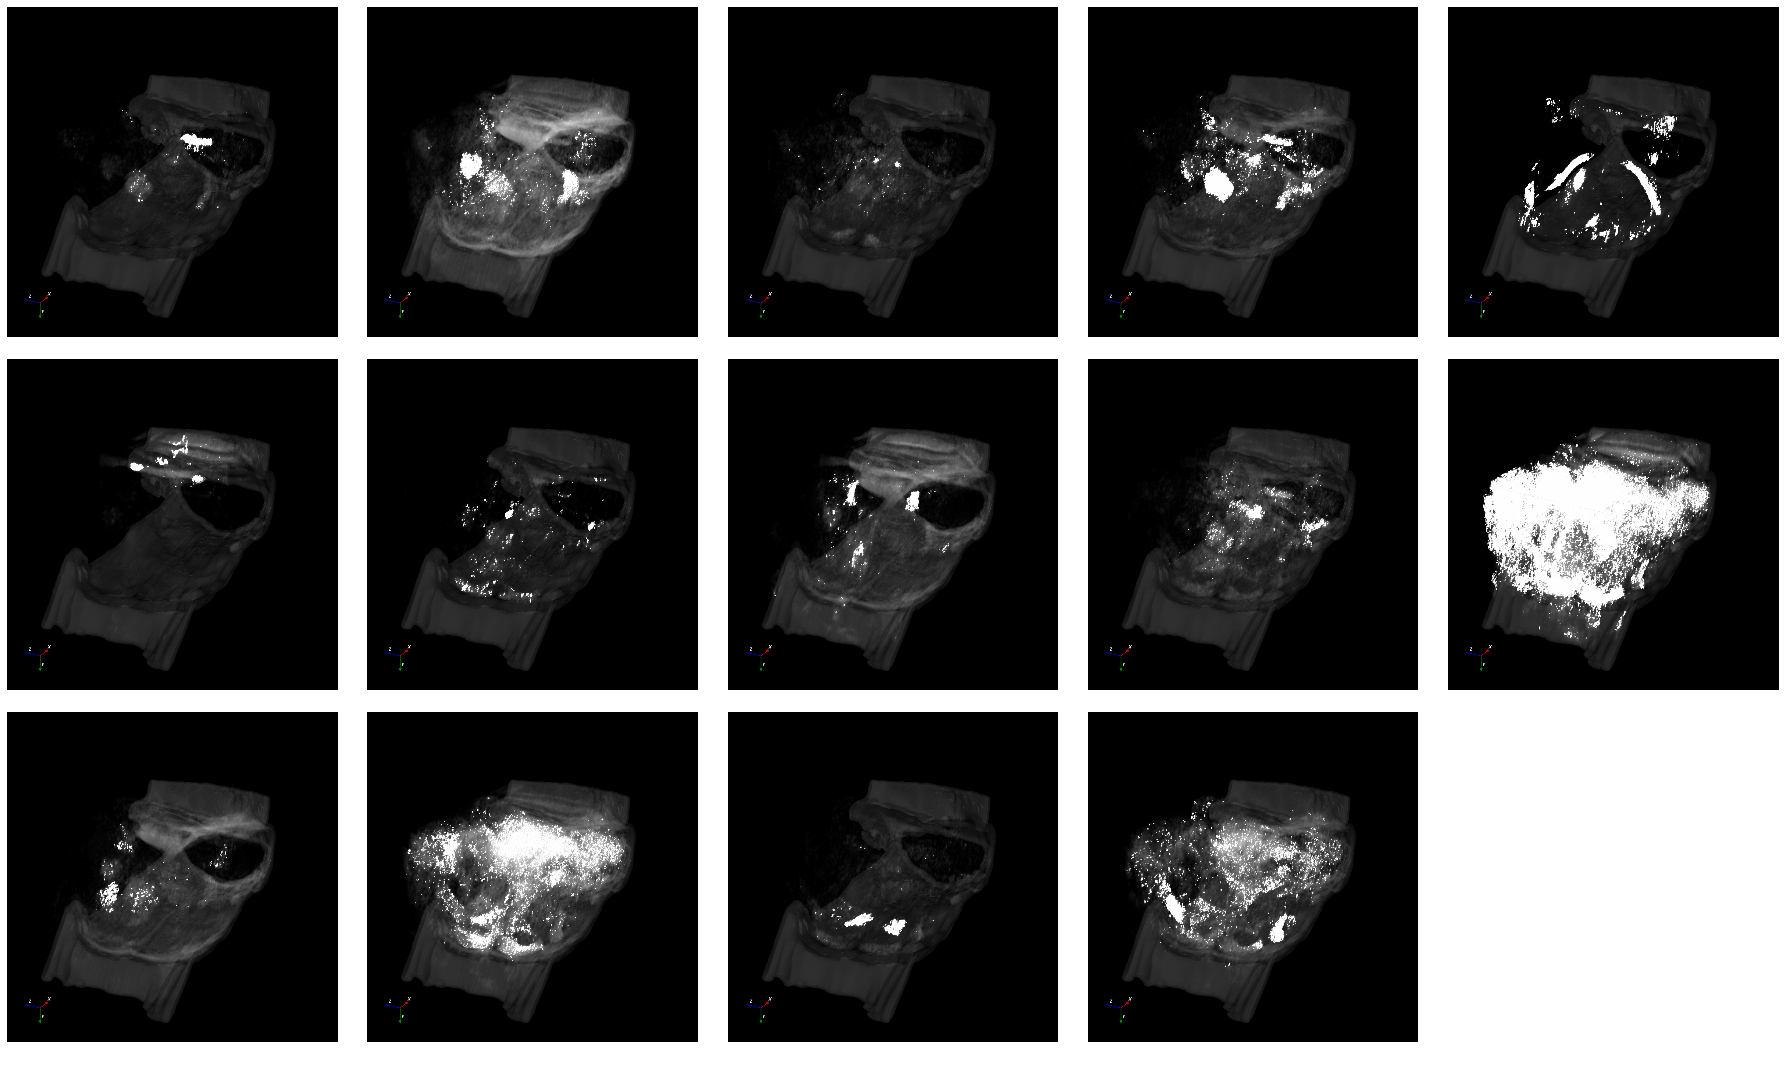

In [22]:
labels = [n for n in labels_unsided if n != 'outerContour' and n != 'sp5']
vizs = [imread((volume_dir + "/%(stack)s/scoreVolume_screenshots/%(stack)s_scoreVolume_%(name)s.png" % \
                           {'stack':stack, 'name':name})) for name in labels]
display_images_in_grids(vizs, 5)

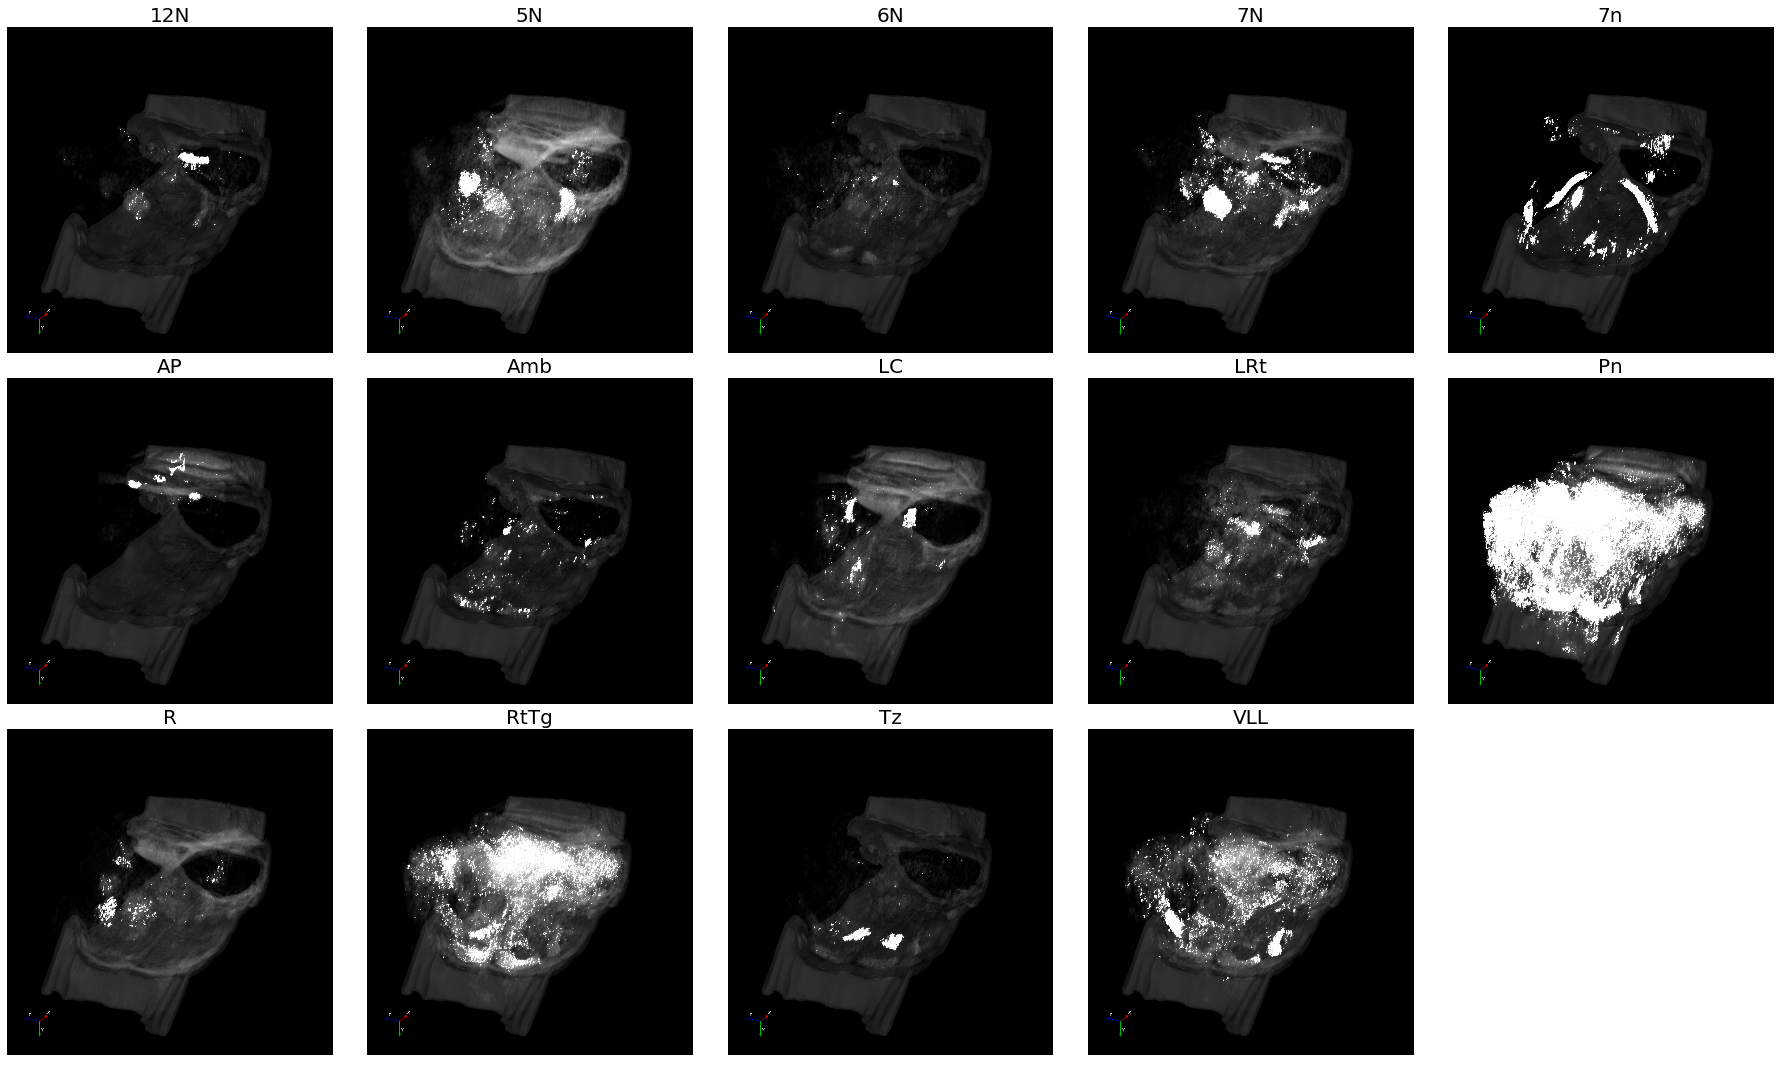

In [19]:
labels = [n for n in labels_unsided if n != 'outerContour' and n != 'sp5']
vizs = [imread((volume_dir + "/%(stack)s/scoreVolume_screenshots/%(stack)s_scoreVolume_%(name)s.png" % \
                           {'stack':stack, 'name':name})) for name in labels]
display_images_in_grids(vizs, 5, labels)

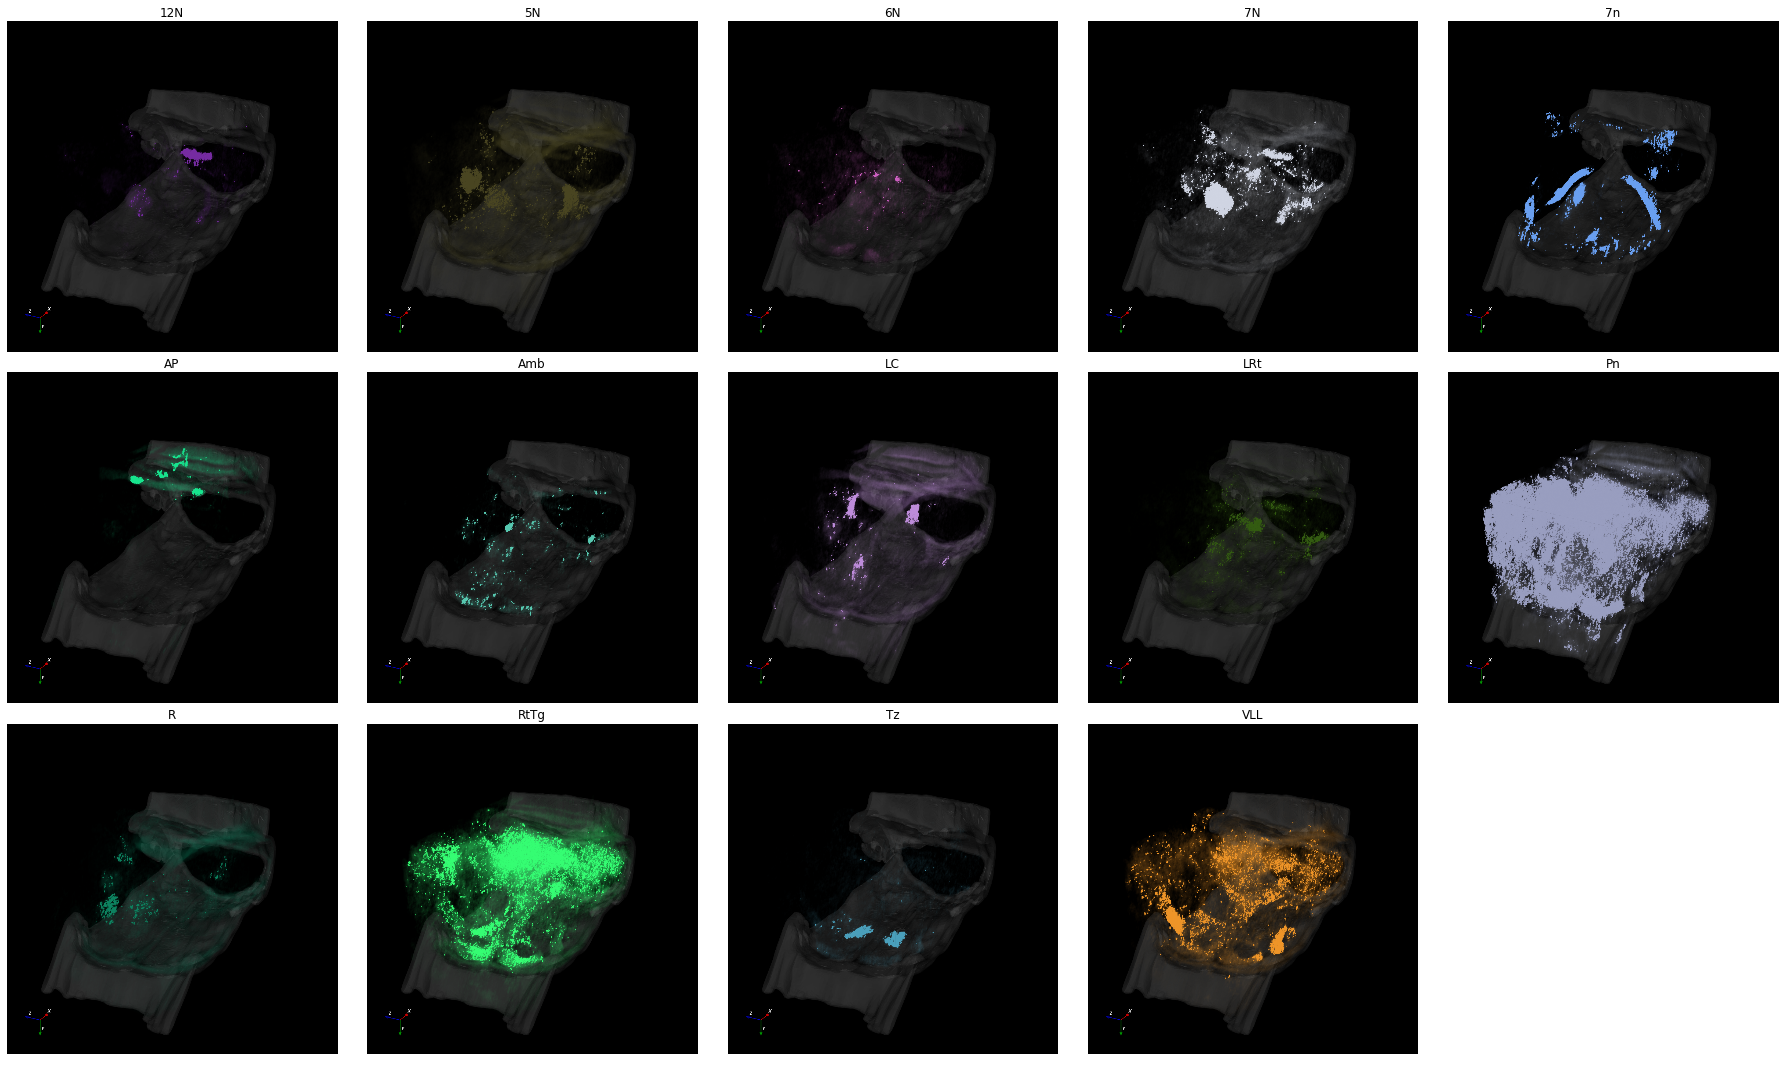

In [27]:
labels = [n for n in labels_unsided if n != 'outerContour' and n != 'sp5']
vizs = [imread((volume_dir + "/%(stack)s/scoreVolume_screenshots/%(stack)s_scoreVolume_%(name)s.png" % \
                           {'stack':stack, 'name':name})) for name in labels]
display_images_in_grids(vizs, 5, labels)